In [51]:
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv('../data/data.csv')
dt19 = pd.read_csv('../data/data2019.csv')
dt20 = pd.read_csv('../data/data2020.csv') 
p18 = pd.read_csv('../data/sp2018.csv')
p19 = pd.read_csv('../data/sp2019.csv')
p20 = pd.read_csv('../data/sp2020.csv')
dt20.value_counts().head()

Date        City/County/Borough/Region  Province/State  Total Confirmed  Total Death
12/31/2020  Abbeville                   South Carolina  1275             25.0           1
            Oakland                     Michigan        61195            1636.0         1
            Ocean                       New Jersey      32509            1356.0         1
            Oceana                      Michigan        1605             43.0           1
            Ochiltree                   Texas           894              17.0           1
dtype: int64

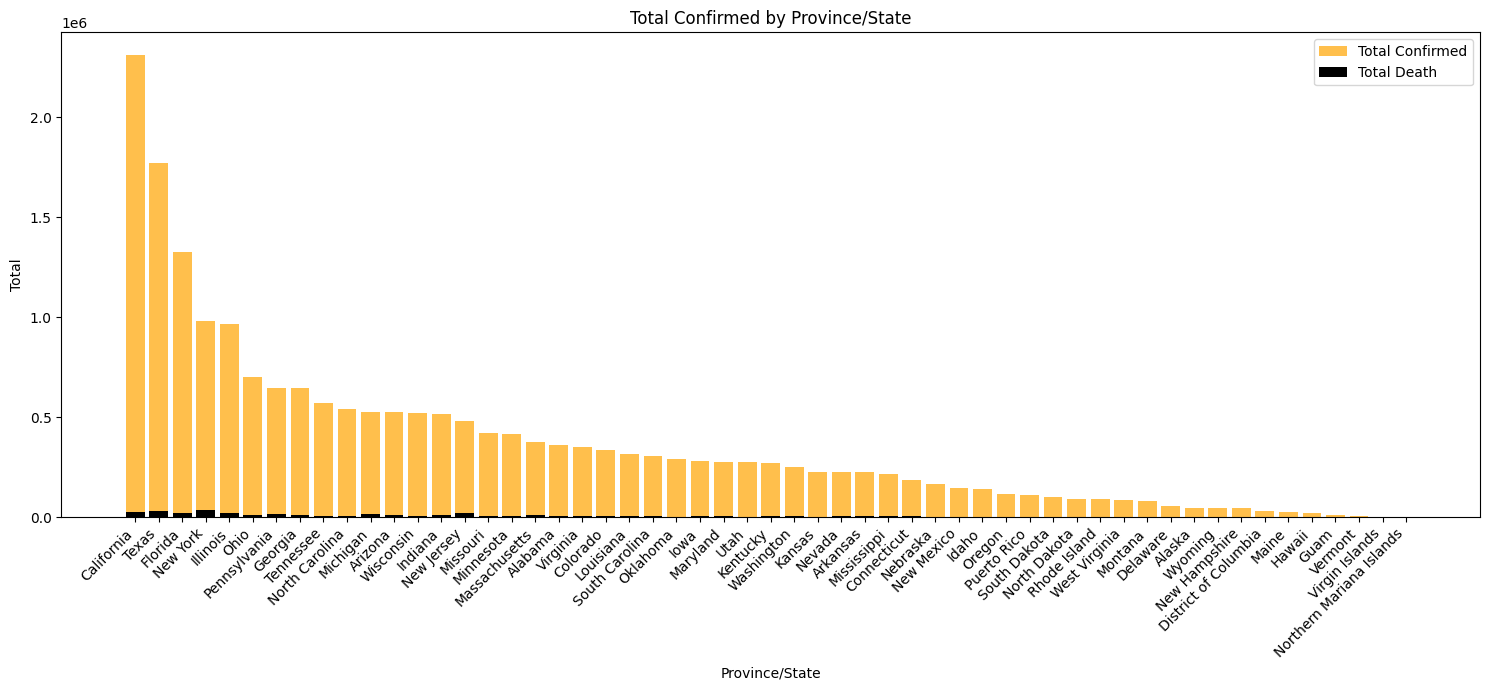

In [53]:
state_dt20 = dt20.groupby('Province/State')[['Total Death', 'Total Confirmed']].sum().reset_index()
state_dt20 = state_dt20.sort_values(by='Total Confirmed', ascending=False)

plt.figure(figsize=(15, 7))

plt.bar(state_dt20['Province/State'], state_dt20['Total Confirmed'], color='orange', label='Total Confirmed',alpha=0.7)
plt.bar(state_dt20['Province/State'], state_dt20['Total Death'], color='black', label='Total Death')

plt.xlabel('Province/State')
plt.ylabel('Total')
plt.title('Total Confirmed by Province/State')

plt.xticks(rotation=45, ha="right")

plt.legend()

plt.tight_layout()
plt.show()

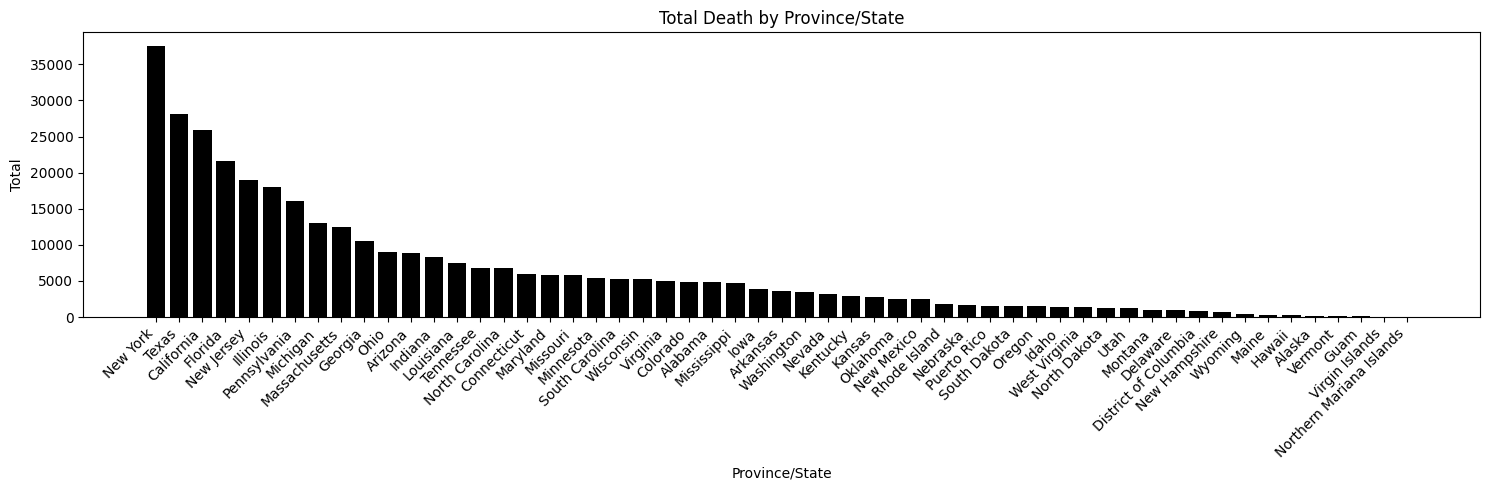

In [54]:
state_dt20 = dt20.groupby('Province/State')[['Total Death', 'Total Confirmed']].sum().reset_index()
state_dt20 = state_dt20.sort_values(by='Total Death', ascending=False)

plt.figure(figsize=(15, 5))

plt.bar(state_dt20['Province/State'], state_dt20['Total Death'], color='black', label='Total Death')

plt.xlabel('Province/State')
plt.ylabel('Total')
plt.title('Total Death by Province/State')

plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

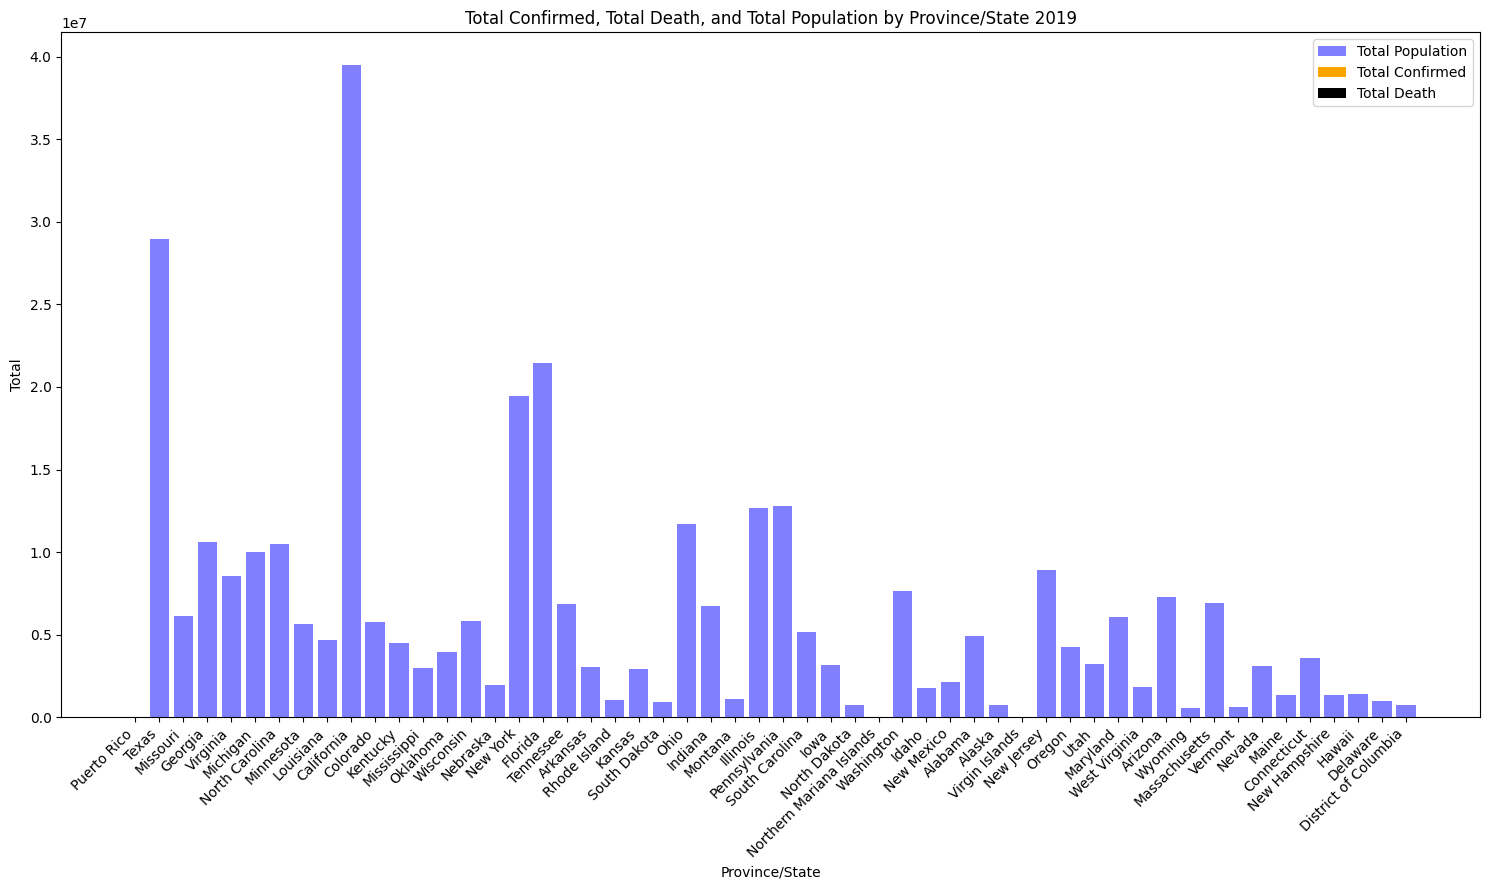

In [60]:
state_dt19 = dt19.groupby('Province/State')[['Total Death', 'Total Confirmed']].sum().reset_index()
state_dt19 = state_dt19.sort_values(by='Total Confirmed', ascending=False)

state_dt19 = state_dt19.merge(p19[['State', '2019 Population']], left_on='Province/State', right_on='State', how='left')

state_dt19['Total Population'] = state_dt19['2019 Population'] + state_dt19['Total Confirmed']

plt.figure(figsize=(15, 9))

plt.bar(state_dt19['Province/State'], state_dt19['Total Population'], color='blue', alpha=0.5, label='Total Population')
plt.bar(state_dt19['Province/State'], state_dt19['Total Confirmed'], color='orange', label='Total Confirmed')
plt.bar(state_dt19['Province/State'], state_dt19['Total Death'], color='black', label='Total Death')


plt.xlabel('Province/State')
plt.ylabel('Total')
plt.title('Total Confirmed, Total Death, and Total Population by Province/State 2019')

plt.xticks(rotation=45, ha="right")

plt.legend()

plt.tight_layout()
plt.show()

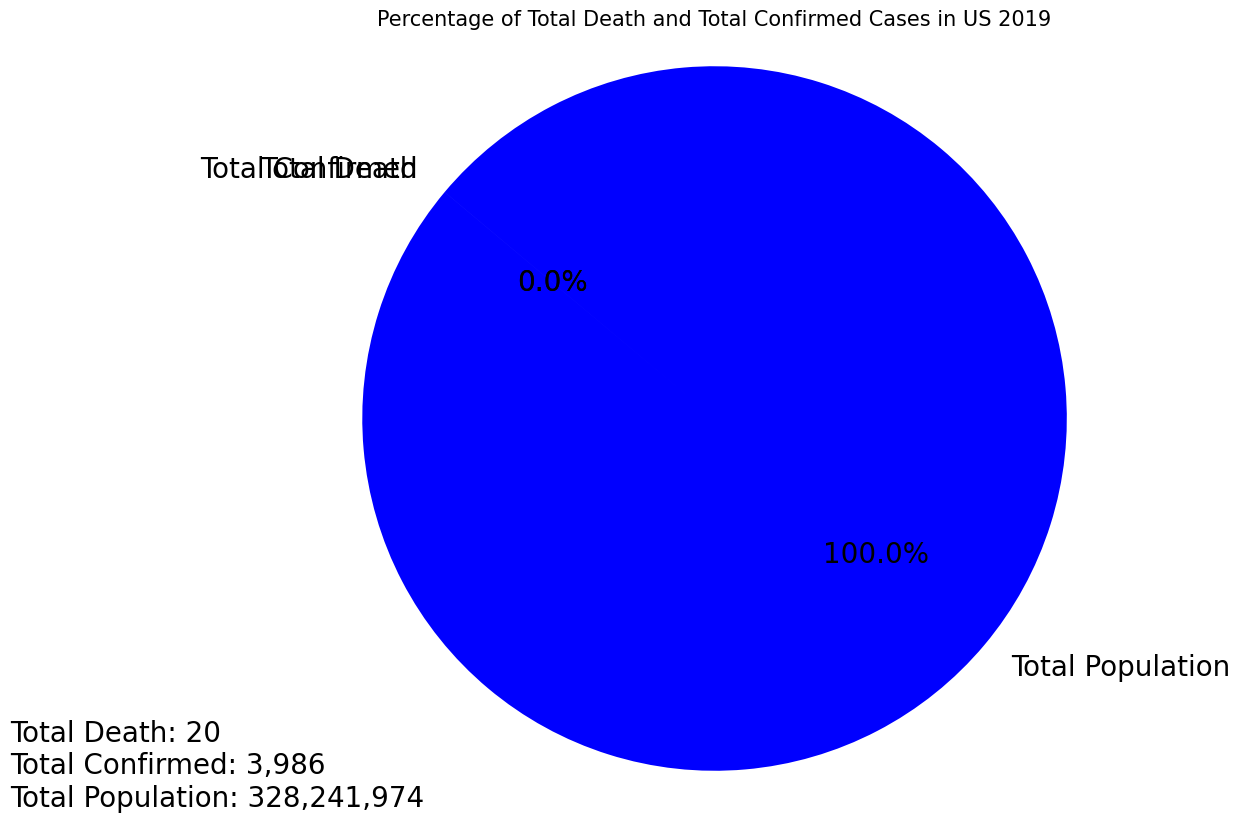

In [56]:
total_deaths = state_dt19['Total Death'].sum()
total_confirmed = state_dt19['Total Confirmed'].sum() - total_deaths
total_population = state_dt19['Total Population'].sum() - total_confirmed - total_deaths

formatted_total_deaths = '{:,}'.format(int(total_deaths))
formatted_total_confirmed = '{:,}'.format(int(total_confirmed))
formatted_total_population = '{:,}'.format(int(state_dt19['Total Population'].sum()))

labels = ['Total Death', 'Total Confirmed', 'Total Population']
sizes = [total_deaths, total_confirmed, total_population]
colors = ['black', 'orange', 'blue']

plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, colors=colors, autopct=lambda x: '{:.1f}%'.format(x), startangle=140, textprops={'fontsize': 20})

title_text = f'Total Death: {formatted_total_deaths}\nTotal Confirmed: {formatted_total_confirmed}'
plt.title('Percentage of Total Death and Total Confirmed Cases in US 2019', fontsize=15)

total_text = f'Total Death: {formatted_total_deaths}\nTotal Confirmed: {formatted_total_confirmed}\nTotal Population: {formatted_total_population}'
plt.text(-2, -1.1, total_text, fontsize=20)

plt.axis('equal')
plt.show()

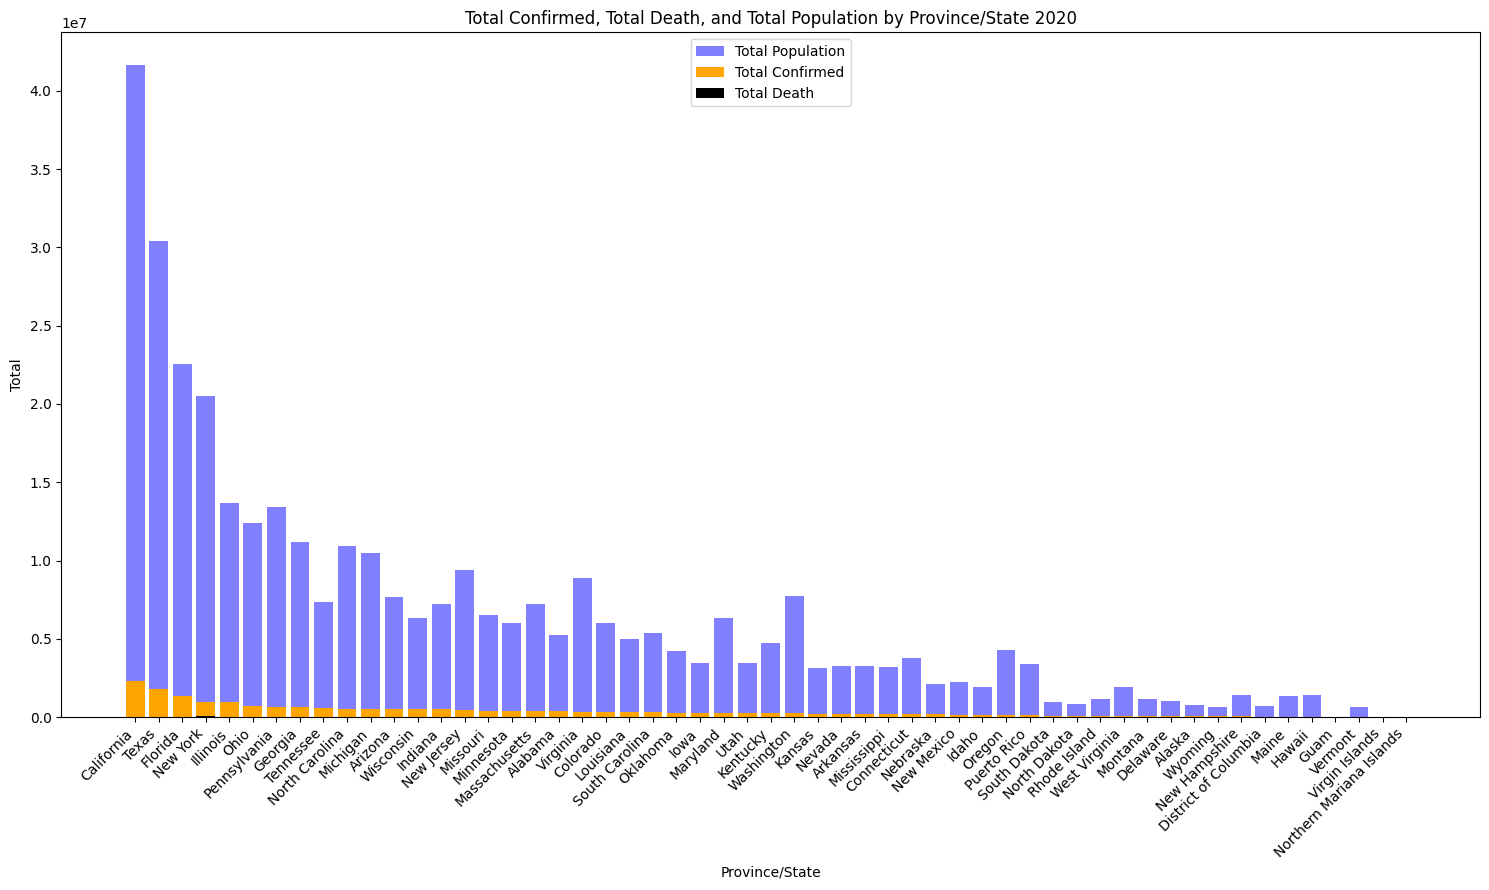

In [57]:
state_dt20 = dt20.groupby('Province/State')[['Total Death', 'Total Confirmed']].sum().reset_index()
state_dt20 = state_dt20.sort_values(by='Total Confirmed', ascending=False)

state_dt20 = state_dt20.merge(p20[['State', '2020 Population']], left_on='Province/State', right_on='State', how='left')

state_dt20['Total Population'] = state_dt20['2020 Population'] + state_dt20['Total Confirmed']

plt.figure(figsize=(15, 9))

plt.bar(state_dt20['Province/State'], state_dt20['Total Population'], color='blue', alpha=0.5, label='Total Population')
plt.bar(state_dt20['Province/State'], state_dt20['Total Confirmed'], color='orange', label='Total Confirmed')
plt.bar(state_dt20['Province/State'], state_dt20['Total Death'], color='black', label='Total Death')


plt.xlabel('Province/State')
plt.ylabel('Total')
plt.title('Total Confirmed, Total Death, and Total Population by Province/State 2020')

plt.xticks(rotation=45, ha="right")

plt.legend()

plt.tight_layout()
plt.show()

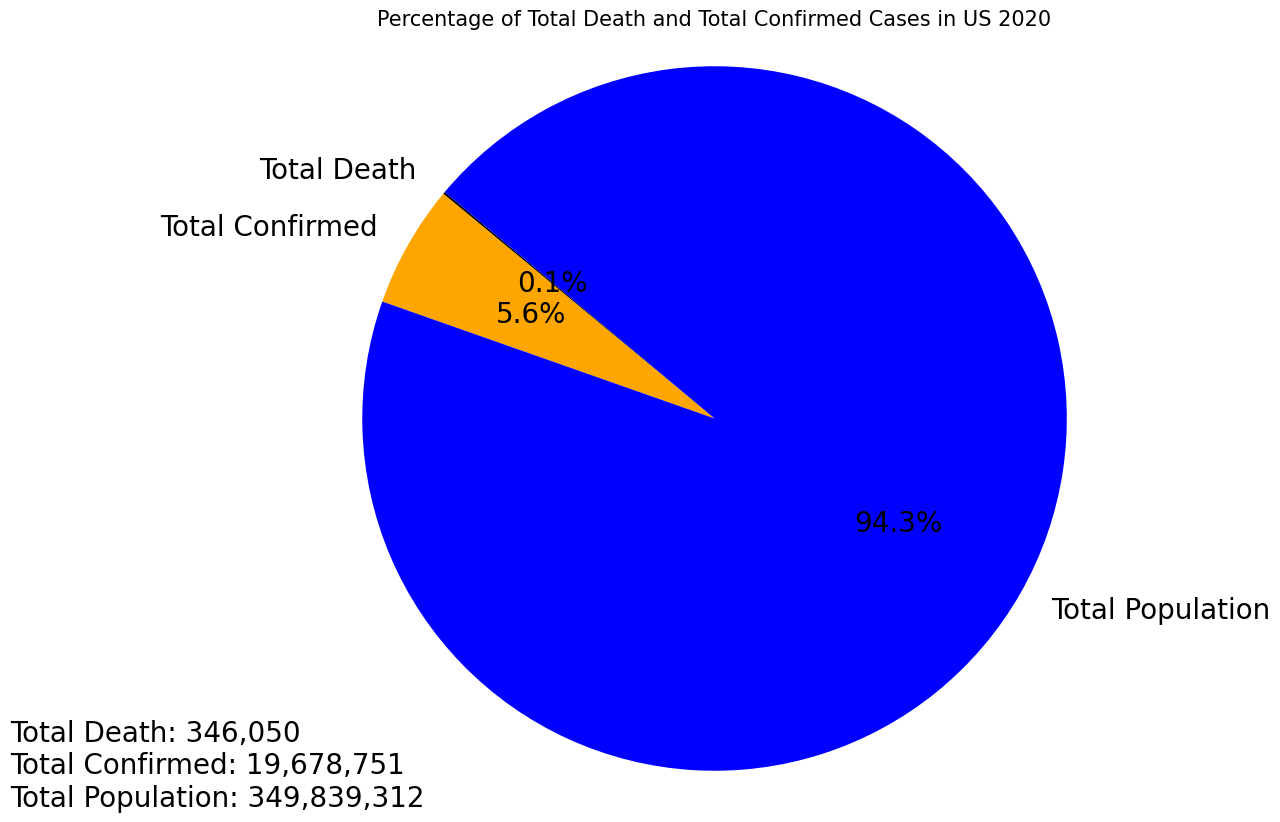

In [58]:
total_deaths = state_dt20['Total Death'].sum()
total_confirmed = state_dt20['Total Confirmed'].sum() - total_deaths
total_population = state_dt20['Total Population'].sum() - total_confirmed - total_deaths

formatted_total_deaths = '{:,}'.format(int(total_deaths))
formatted_total_confirmed = '{:,}'.format(int(total_confirmed))
formatted_total_population = '{:,}'.format(int(state_dt20['Total Population'].sum()))

labels = ['Total Death', 'Total Confirmed', 'Total Population']
sizes = [total_deaths, total_confirmed, total_population]
colors = ['black', 'orange', 'blue']

plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, colors=colors, autopct=lambda x: '{:.1f}%'.format(x), startangle=140, textprops={'fontsize': 20})

title_text = f'Total Death: {formatted_total_deaths}\nTotal Confirmed: {formatted_total_confirmed}'
plt.title('Percentage of Total Death and Total Confirmed Cases in US 2020', fontsize=15)

total_text = f'Total Death: {formatted_total_deaths}\nTotal Confirmed: {formatted_total_confirmed}\nTotal Population: {formatted_total_population}'
plt.text(-2, -1.1, total_text, fontsize=20)

plt.axis('equal')
plt.show()